## Simple Deep Neural Network - TF2.0 + Keras

In [1]:
import tensorflow as tf
import numpy as np
import datetime
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [2]:
%matplotlib inline

###  Working with Fashion MNIST and/or MNIST data.
#### Download and process the data

In [3]:
# Basic function to download the fashion mnist data
def load_and_normalize_fmnist_data():
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (xtrain, ytrain),(xtest, ytest) = fashion_mnist.load_data()
    xtrain = xtrain/255.0
    xtest = xtest/255.0
    return ((xtrain,ytrain),(xtest,ytest))

In [4]:
# Basic function to download the mnist data
def load_and_normalize_mnist_data():
    mnist = tf.keras.datasets.mnist
    (xtrain, ytrain),(xtest, ytest) = mnist.load_data()
    xtrain = xtrain/255.0
    xtest = xtest/255.0
    return ((xtrain,ytrain),(xtest,ytest))

### Display the data

In [5]:
(training_images, training_labels),(test_images,test_labels) = load_and_normalize_fmnist_data()

4423680/4422102 [==============================] - 1s 0us/step


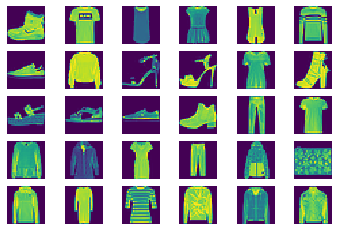

In [6]:
images_per_row = 5
columns = 6
offset = 1
for i in range(images_per_row*columns):
    plt.subplot(images_per_row,columns,offset)
    plt.imshow(training_images[i])
    offset+=1
    plt.axis('off')

### Build a Neural Network Model

In [7]:
def get_model():
    model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

### Callback functions

In [8]:
# Callback function to stop training on reaching specific accuracy
class EarlyStopAtAccuracy():
    def on_epoch_begin(self, epoch, logs = {}):
        print("\nBeginning of Epoch% {}".format(epoch))
    
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('acc') > 0.90):
            print("\n Reached 90% accuracy")
            self.model.stop_training = True

In [9]:
# Callback to print batch details
class PrintBatchDetails(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs = {}):
        print("\n Training: batch {} begins at {}".format(batch, datetime.datetime.now().time()))
    
    def on_train_batch_end(self, batch, logs = {}):
        print("\n Training batch {} end at {}".format(batch, datetime.datetime.now().time()))

### Training the neural network model

In [39]:
def train_fashion_mnist():
    EarlyStop = EarlyStopAtAccuracy()
    PrintTimings = PrintBatchDetails()
    
    (training_images, training_labels),(test_images,test_labels) = load_and_normalize_fmnist_data()
    model = get_model()
    history = model.fit(training_images, training_labels, epochs = 2)
    return history

In [35]:
model = get_model()
history = model.fit(training_images, training_labels, epochs = 2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4970 - accuracy: 0.8264
Epoch 2/2
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3753 - accuracy: 0.8653


In [36]:
history.model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3799 - accuracy: 0.8624


[0.3798741283416748, 0.8624]

In [45]:
def evaluate_model(trained_object_model, test_images, test_labels):
    return(trained_object_model.model.evaluate(test_images, test_labels))

In [46]:
output = train_fashion_mnist()
print("\n Training Accuracy = {}".format(output.history['accuracy'][-1]))

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4975 - accuracy: 0.8261
Epoch 2/2
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3742 - accuracy: 0.8637

 Training Accuracy = 0.8636833429336548


In [47]:
evaluate_model(output,test_images, test_labels)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3924 - accuracy: 0.8578


[0.3924014880657196, 0.8578]